In [1]:
import pandas as pd

In [2]:
MovieClassification_df = pd.read_csv(r"D:\sam_py_course\july 24\Movie_classification.csv")

In [3]:
MovieClassification_df.shape

(506, 19)

In [6]:
MovieClassification_df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


## Target Variable

In [7]:
MovieClassification_df['Start_Tech_Oscar'].nunique()

2

## Drop Duplicates

In [8]:
MovieClassification_df.duplicated().sum()

0

## Missing Values

In [9]:
MovieClassification_df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

## Filling Missing values with 0

In [10]:
# imputing time_taken missing values with mean
time_taken_mean = MovieClassification_df['Time_taken'].mean()
MovieClassification_df['Time_taken']=MovieClassification_df['Time_taken'].fillna(time_taken_mean)

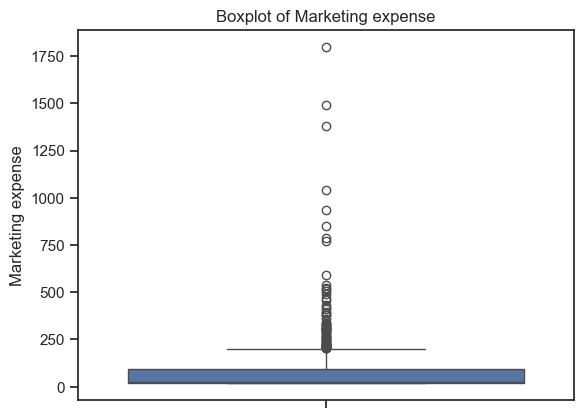

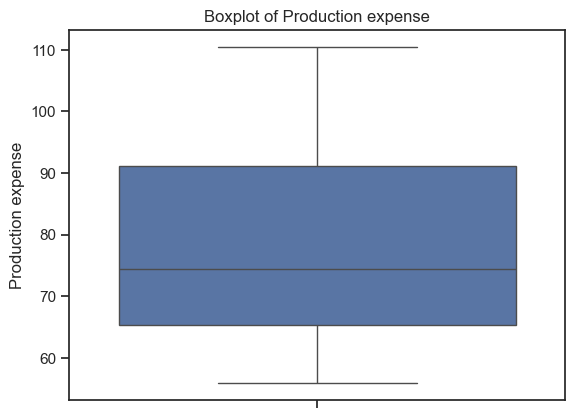

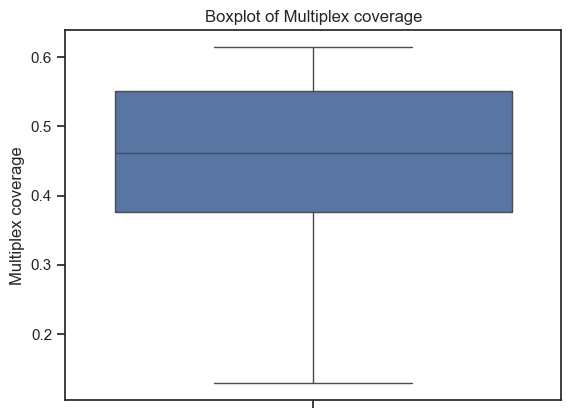

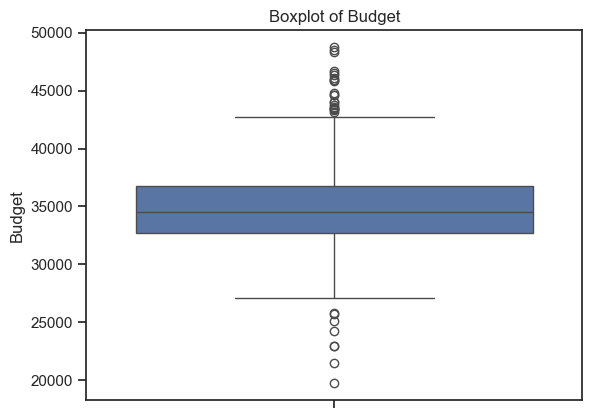

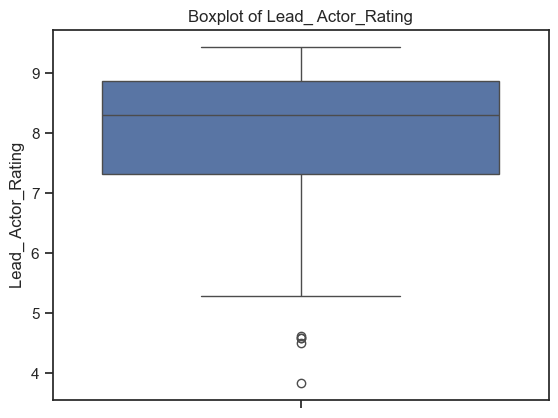

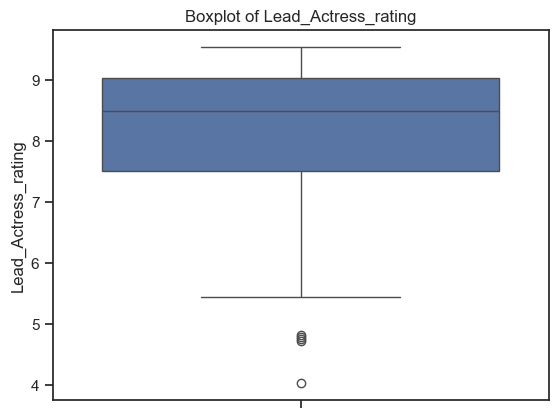

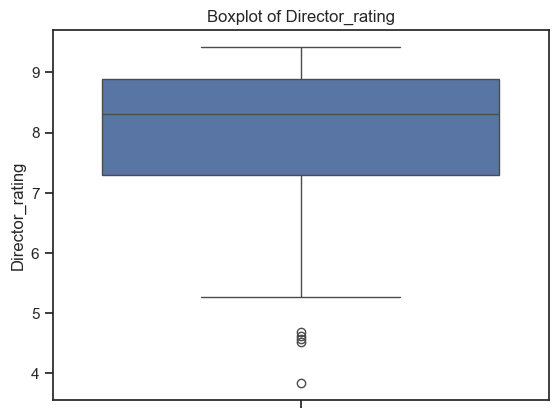

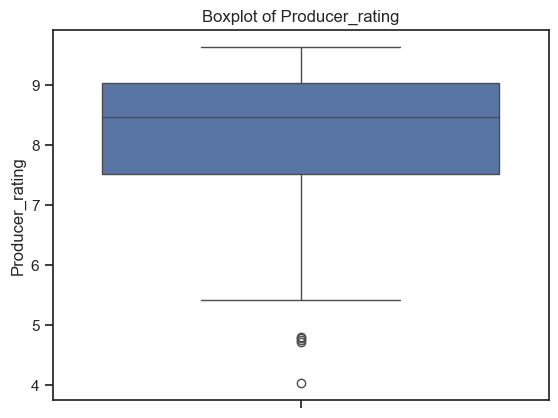

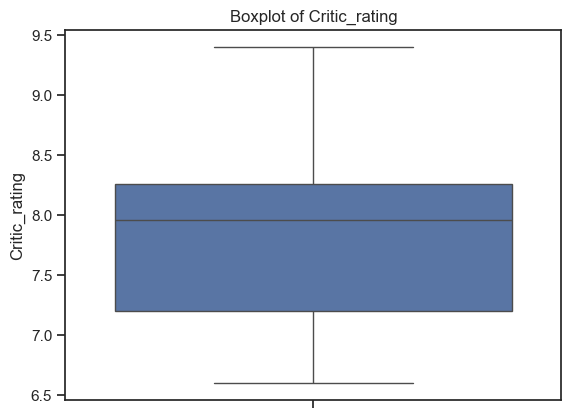

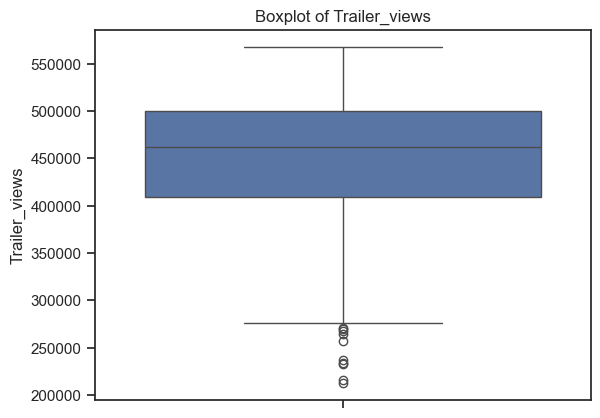

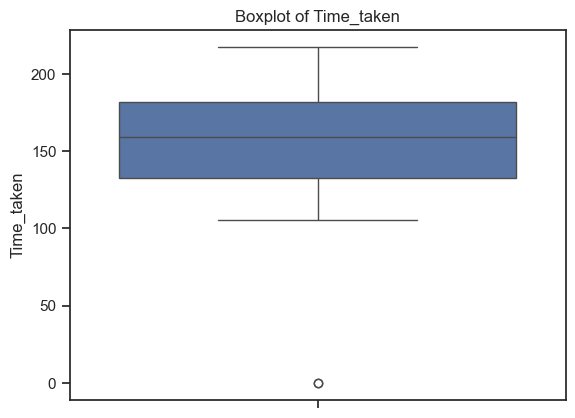

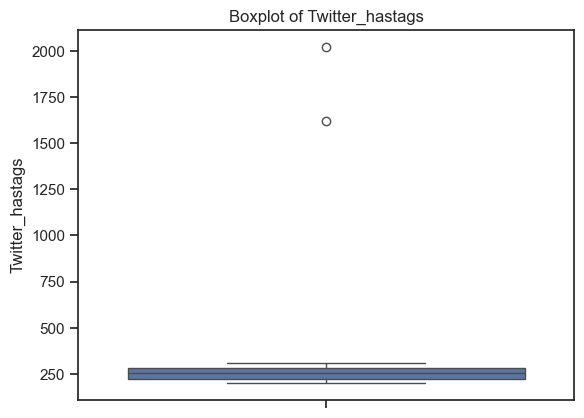

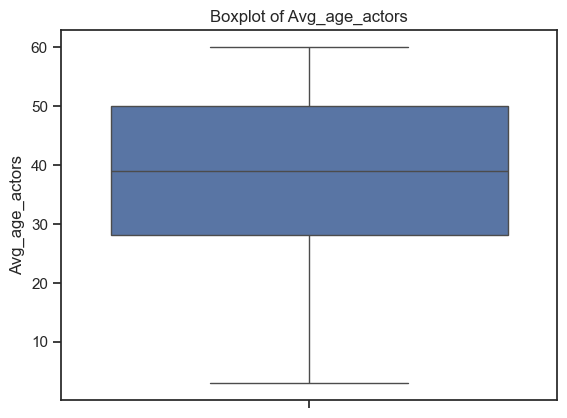

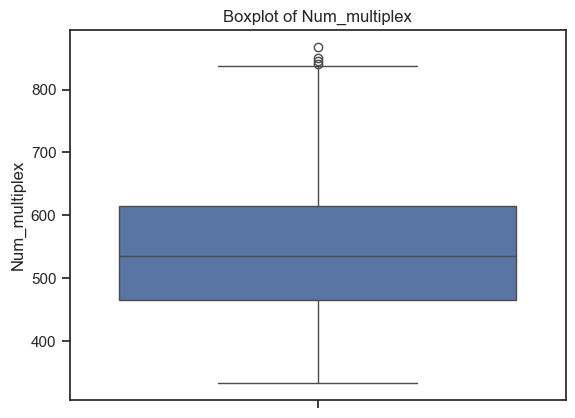

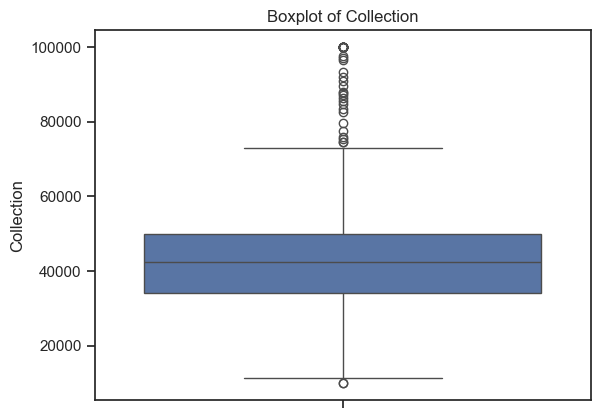

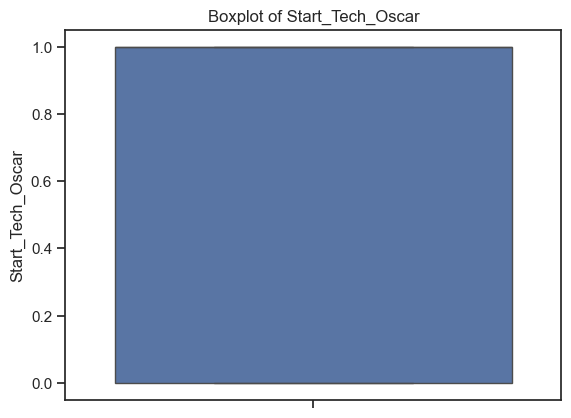

In [11]:
## Outliers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Marketing expense','Production expense','Multiplex coverage','Budget','Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating','Critic_rating','Trailer_views','Time_taken','Twitter_hastags','Avg_age_actors','Num_multiplex','Collection','Start_Tech_Oscar']
sns.set(style='ticks')


for col in numeric_cols:
    sns.boxplot(y=MovieClassification_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

## Deleting the wrong outlier in column of "Time Taken'

In [12]:
MovieClassification_df['Time_taken'].sort_values(ascending = False)

98     217.52
253    217.12
372    216.00
306    213.36
274    212.96
        ...  
47     106.64
478    105.84
142    105.36
50       0.00
112      0.00
Name: Time_taken, Length: 506, dtype: float64

In [13]:
MovieClassification_df[MovieClassification_df['Time_taken'] == 0]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
50,21.7746,66.28,0.561,33124.465,119.2,6.460,6.725,6.50,6.685,7.64,442225,YES,0.0,223.152,Thriller,21,404,39400,0
112,22.4658,75.02,0.453,32846.715,166.4,8.725,8.885,8.72,8.965,7.44,394329,YES,0.0,303.008,Thriller,35,577,37600,1


In [14]:
MovieClassificationnew_df=MovieClassification_df.drop([50,112],axis=0).reset_index(drop = True)

In [15]:
MovieClassificationnew_df[MovieClassificationnew_df['Time_taken'] == 0]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar


In [16]:
MovieClassification_df['Twitter_hastags'].sort_values(ascending = False)

2      2022.400
423    1622.400
166     308.000
267     308.000
369     308.000
         ...   
388     201.632
436     201.536
490     201.296
416     201.200
401     201.152
Name: Twitter_hastags, Length: 506, dtype: float64

In [17]:
MovieClassificationnew2_df=MovieClassification_df.drop([2,423],axis=0).reset_index(drop = True)

In [18]:
MovieClassificationnew2_df[MovieClassificationnew2_df['Twitter_hastags']==1622.4000]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar


In [19]:
MovieClassificationnew2_df['Twitter_hastags'].sort_values(ascending = False)

165    308.000
368    308.000
266    308.000
203    308.000
261    307.808
        ...   
387    201.632
434    201.536
488    201.296
415    201.200
400    201.152
Name: Twitter_hastags, Length: 504, dtype: float64

## Model Building

In [20]:
MovieClassificationnew2_df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
3,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
4,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,YES,143.48,284.592,Comedy,53,460,57400,0


In [21]:
data = MovieClassificationnew2_df.copy()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [34]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [35]:
data['3D_available'] = le.fit_transform(data['3D_available'])

In [36]:
X = data.drop('Start_Tech_Oscar', axis = 1)
y = data['Start_Tech_Oscar']

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [40]:
scaling_columns = ['Marketing expense','Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
        'Time_taken', 'Twitter_hastags','Avg_age_actors', 'Num_multiplex', 'Collection']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size=0.2,random_state=42)

In [42]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = model.predict(X_test)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.6138613861386139
Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57        47
           1       0.63      0.67      0.65        54

    accuracy                           0.61       101
   macro avg       0.61      0.61      0.61       101
weighted avg       0.61      0.61      0.61       101

